In [1]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import random_split, Dataset, DataLoader
from transformers import AutoTokenizer, AutoConfig, AutoModelWithLMHead
from transformers import AutoTokenizer, GPT2LMHeadModel, GPT2Config
from transformers import AdamW, get_linear_schedule_with_warmup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(
    "HooshvareLab/gpt2-fa",
    bos_token='<s>', 
    eos_token='</s>', 
    pad_token='<pad>',
    unk_token='<unk>'
)

tokenizer.add_special_tokens({
    "bos_token": '</s>',
    "eos_token": '</s>', 
    "pad_token": '<pad>',
    "unk_token": '<unk>'
})

config = AutoConfig.from_pretrained(
    "HooshvareLab/gpt2-fa",
    bos_token_id=tokenizer("<s>")["input_ids"][0], 
    eos_token_id=tokenizer("</s>")["input_ids"][0], 
    pad_token_id=tokenizer("<pad>")["input_ids"][0],
    unk_token_id=tokenizer("<unk>")["input_ids"][0],
)

with open('ferdousi.txt', 'r', encoding="utf8") as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines][2:]
    lines = lines[:-1]
    beyts = []
    for i in range(int(len(lines)/4)):
        beyts.append(lines[4*i] + "<sep>" + lines[4*i+1]+ "<sep>" + "<|startoftext|>" + lines[4*i+2] + "<sep>" + lines[4*i+3]+ "<sep>")
    
for i in range(5) :
    print(beyts[i])

print("maximum number of words in a beyt:")
print(max([len(beyt.split()) for beyt in beyts]))

max_len = 40

c:\Users\lesol\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /HooshvareLab/gpt2-fa/resolve/main/tokenizer_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001C8B4541B90>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/tokenizer_config.json
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /HooshvareLab/gpt2-fa/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001C8D826ADD0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown whi

به نام خداوند جان و خرد<sep>کزین برتر اندیشه برنگذرد<sep><|startoftext|>خداوند نام و خداوند جای<sep>خداوند روزی ده رهنمای<sep>
خداوند کیوان و گردان سپهر<sep>فروزنده ماه و ناهید و مهر<sep><|startoftext|>ز نام و نشان و گمان برترست<sep>نگارندهٔ بر شده پیکرست<sep>
به بینندگان آفریننده را<sep>نبینی مرنجان دو بیننده را<sep><|startoftext|>نیابد بدو نیز اندیشه راه<sep>که او برتر از نام و از جایگاه<sep>
سخن هر چه زین گوهران بگذرد<sep>نیابد بدو راه جان و خرد<sep><|startoftext|>خرد گر سخن برگزیند همی<sep>همان را گزیند که بیند همی<sep>
ستودن نداند کس او را چو هست<sep>میان بندگی را ببایدت بست<sep><|startoftext|>خرد را و جان را همی سنجد اوی<sep>در اندیشهٔ سخته کی گنجد اوی<sep>
maximum number of words in a beyt:
33


In [2]:
class poetryDataset(Dataset):
    def __init__(self, beyts, tokenizer, max_len=1024):

        self.tokenizer = tokenizer 
        self.input_ids = []
        self.attn_masks = []

        for beyt in beyts:
            tokenized = tokenizer('<s>' + beyt + '</s>', truncation=True, max_length=max_len, padding="max_length")
            self.input_ids.append(torch.tensor(tokenized['input_ids']))
            self.attn_masks.append(torch.tensor(tokenized['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx], self.input_ids[idx]
    

dataset = poetryDataset(beyts, tokenizer, max_len)
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print("sample from dataset:")
print(dataset[0][0])
print(dataset[0][1])
print(dataset[0][2])
print(tokenizer.decode(dataset[0][0]))
print(tokenizer.decode(dataset[0][2]))

sample from dataset:
tensor([    0,   490,   561,  6733,  1305,   293,  2964,     9,  2639,   297,
         3206,  6188, 29631,   383,   343,     9,     6, 12090,   595,   561,
          293,  6733,   798,     9, 12090,   595,  3588,   546, 11552,   450,
            9,     2,     1,     1,     1,     1,     1,     1,     1,     1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([    0,   490,   561,  6733,  1305,   293,  2964,     9,  2639,   297,
         3206,  6188, 29631,   383,   343,     9,     6, 12090,   595,   561,
          293,  6733,   798,     9, 12090,   595,  3588,   546, 11552,   450,
            9,     2,     1,     1,     1,     1,     1,     1,     1,     1])
<s>به نام خداوند جان و خرد<sep>کزین برتر اندیشه برنگذرد<sep><|startoftext|>خداوند نام و خداوند جای<sep>خداوند روزی ده رهنمای<sep></s><pad><pad><pad><pad><pad><pad><pad><pad>
<s>به نام خداوند جان و خرد<sep>کزین برتر ا

In [3]:
num_epochs = 1
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

torch.cuda.empty_cache()
configuration = GPT2Config.from_pretrained('HooshvareLab/gpt2-fa', output_hidden_states=False)
model = GPT2LMHeadModel.from_pretrained("HooshvareLab/gpt2-fa", config=configuration)
model.resize_token_embeddings(len(tokenizer))
model.to(device)

optimizer = AdamW(model.parameters(), lr=1e-3, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=4000, num_training_steps=len(train_loader) * num_epochs)

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /HooshvareLab/gpt2-fa/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001C8D0C06AD0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/config.json
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /HooshvareLab/gpt2-fa/resolve/main/generation_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001C8D0C45AD0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/generation_config.json
c:\Users\lesol\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in 

Epoch: 0, Loss:  10.757376670837402
Epoch: 0, Loss:  3.5103728771209717


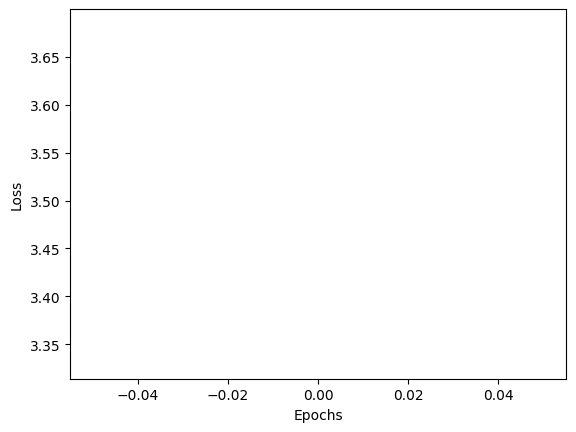

In [4]:
train_loss = []
for epoch in range(num_epochs):
    model.train()
    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()

        input_ids = batch[0].to(device)
        attn_mask = batch[1].to(device)
        full_beyt = batch[2].to(device)
        outputs = model(input_ids, labels=full_beyt, attention_mask=attn_mask, token_type_ids=None)

        loss = outputs[0]
        loss.backward()
        optimizer.step()
        scheduler.step()

        if i % 500 == 0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

    train_loss.append(loss.item())

# plt.plot(train_loss)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

In [10]:
def besora(txt):
    model.eval()
    txt = '<s>' + "<|startoftext|>" + txt + '</s>'
    input_ids = torch.tensor(tokenizer.encode(txt)).unsqueeze(0)
    input_ids = input_ids.to(device)
    attention_mask = input_ids.ne(tokenizer.pad_token_id).float().to(device)
    outputs = model.generate(input_ids, max_length=40, do_sample=True, top_k=50, top_p=0.95, num_return_sequences=1, 
                            attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id)
    generated = tokenizer.decode(outputs[0], skip_special_tokens=False)
    generated = generated.replace("<|startoftext|>", "")
    generated = generated.replace("<s>", "")
    generated = generated.replace("</s>", " ")
    generated = generated.replace("<pad>", "")
    generated = generated.replace("<sep>", "     ")
    return generated

print(besora("در دلم آتشی بسوخت از آن آتش بگو"))

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


در دلم آتشی بسوخت از آن آتش بگو که آن را همی بداراست نهان     به هر سو در نهان گاه خویش      


In [11]:
print(besora("چو تمرین مهلک به پایان رسد"))

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


چو تمرین مهلک به پایان رسد بدو داد و شد شاه نوذر بماند     همه نامداران و هر مهتری     خردمند و بر دانش و رای خویش      


In [17]:
print(besora("به نام خداوند گردان"))

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


به نام خداوند گردان به نیکی تو گر من بر چرخ بلند     چو تو بر تو اندر بیاری کنی     پرستندهٔ بدی و داد کنی      


In [33]:
print(besora("جهان آفرین را چون نگاه کنم"))

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


جهان آفرین را چون نگاه کنم خرد را سر تاج و تخت کنم     نخواهد که دارد این را بر من راست     بماند از بر من ز من بر نهان      


In [34]:
# save the model
model.save_pretrained("model")
tokenizer.save_pretrained("model")

('model\\tokenizer_config.json',
 'model\\special_tokens_map.json',
 'model\\vocab.json',
 'model\\merges.txt',
 'model\\added_tokens.json',
 'model\\tokenizer.json')

In [38]:
# load the model
model = GPT2LMHeadModel.from_pretrained("model")
tokenizer = AutoTokenizer.from_pretrained("model")

# model.eval()
# with torch.no_grad():
#     for i, (input_ids, attn_mask, labels) in enumerate(test_loader):
#         input_ids = input_ids.to(device)
#         attn_mask = attn_mask.to(device)
#         labels = labels.to(device)
#         outputs = model(input_ids, attention_mask=attn_mask, labels=labels)
#         loss = outputs[0]
#         if i % 100 == 0:
#             print(f'Epoch: {epoch}, Loss:  {loss.item()}')